In [31]:
%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, balanced_accuracy_score, accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
heart = pd.read_csv("heart_2020_cleaned.csv")

In [4]:
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [8]:
#Changing Textual Data to Numeric Data
heart.replace("Yes", 1, inplace = True)
heart.replace("No", 0, inplace = True)
heart["Sex"].replace("Male", 1, inplace = True)
heart["Sex"].replace("Female", 0, inplace = True)

#heart["Sex"] = np.where(heart["Sex"].str.contains("Male"), 1, 0)

heart["GenHealth"].replace("Poor", 1, inplace = True)
heart["GenHealth"].replace("Fair", 2, inplace = True)
heart["GenHealth"].replace("Good", 3, inplace = True)
heart["GenHealth"].replace("Very good", 4, inplace = True)
heart["GenHealth"].replace("Excellent", 5, inplace = True)

heart["Diabetic"].replace("No", 0, inplace = True)
heart["Diabetic"].replace("No, borderline diabetes", 0, inplace = True)
heart["Diabetic"].replace("Yes", 1, inplace = True)
heart["Diabetic"].replace("Yes (during pregnancy)", 1, inplace = True)

heart["AgeCategory"].replace("18-24", 1, inplace = True)
heart["AgeCategory"].replace("25-29", 2, inplace = True)
heart["AgeCategory"].replace("30-34", 3, inplace = True)
heart["AgeCategory"].replace("35-39", 4, inplace = True)
heart["AgeCategory"].replace("40-44", 5, inplace = True)
heart["AgeCategory"].replace("45-49", 6, inplace = True)
heart["AgeCategory"].replace("50-54", 7, inplace = True)
heart["AgeCategory"].replace("55-59", 8, inplace = True)
heart["AgeCategory"].replace("60-64", 9, inplace = True)
heart["AgeCategory"].replace("65-69", 10, inplace = True)
heart["AgeCategory"].replace("70-74", 11, inplace = True)
heart["AgeCategory"].replace("75-79", 12, inplace = True)
heart["AgeCategory"].replace("80 or older", 13, inplace = True)

In [11]:
heart.drop(['Race', 'PhysicalHealth', 'MentalHealth'], axis = 1, inplace = True)

In [12]:
heart['SleepTime'] = heart['SleepTime'].astype(int)

In [14]:
heart.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,0,0,8,1,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,13,0,1,4,7,0,0,0
2,0,26.58,1,0,0,0,1,10,1,1,2,8,1,0,0
3,0,24.21,0,0,0,0,0,12,0,0,3,6,0,0,1
4,0,23.71,0,0,0,1,0,5,0,1,4,8,0,0,0


In [15]:
heart.shape

(319795, 15)

<b>Splitting the Dataset</b>

In [53]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(heart.iloc[:, 1:], heart['HeartDisease'], test_size = 0.3, random_state = 0)

<b>Logistic Regression</b>

In [19]:
#Logistic Regression
logreg = LogisticRegression(random_state = 0, n_jobs = -2)
logreg.fit(X_train, y_train)

LogisticRegression(n_jobs=-2, random_state=0)

In [29]:
y_test_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

In [23]:
from sklearn.metrics import confusion_matrix
my_matrix1 = confusion_matrix(y_test, y_test_pred)
print(my_matrix1)

print("True Pos is:", my_matrix1[1, 1])
print("True Neg is:", my_matrix1[0, 0])
print("False Pos is:", my_matrix1[0, 1])
print("False Neg is:", my_matrix1[1, 0]) 

[[87000   730]
 [ 7360   849]]
True Pos is: 849
True Neg is: 87000
False Pos is: 730
False Neg is: 7360


In [32]:
print('Precision score:', round(precision_score(y_test, y_test_pred),4))
print('Recall score:', round(recall_score(y_test, y_test_pred),4))
print('Accuracy score:', round(accuracy_score(y_test, y_test_pred),4))
print('F1 score:', round(f1_score(y_test, y_test_pred),4))
print('AUC for logistic regression', round(roc_auc_score(y_test, y_pred_proba),4))

Precision score: 0.5377
Recall score: 0.1034
Accuracy score: 0.9157
F1 score: 0.1735
AUC for logistic regression 0.8392


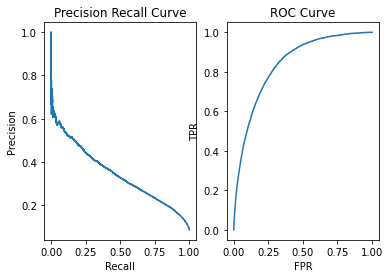

In [36]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

plt.subplot(1, 2, 1)
precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)
plt.title("Precision Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")

plt.subplot(1, 2, 2)
fpr, tpr , threshold = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

<b>Logistic Regression with SMOTE</b>

In [37]:
oversample = SMOTE(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(heart.iloc[:, 1:], heart['HeartDisease'])
X_train, X_test, y_train, y_test =  train_test_split(X_over, y_over,test_size=0.3, random_state = 3)
Logsm = LogisticRegression(random_state = 3)
Logsm.fit(X_train, y_train)

LogisticRegression(random_state=3)

In [38]:
y_test_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

In [39]:
my_matrix2 = confusion_matrix(y_test, y_test_pred)
print(my_matrix2)

print("True Pos is:", my_matrix2[1, 1])
print("True Neg is:", my_matrix2[0, 0])
print("False Pos is:", my_matrix2[0, 1])
print("False Neg is:", my_matrix2[1, 0]) 

[[86908   708]
 [82621  5217]]
True Pos is: 5217
True Neg is: 86908
False Pos is: 708
False Neg is: 82621


In [40]:
print('Precision score:', round(precision_score(y_test, y_test_pred),4))
print('Recall score:', round(recall_score(y_test, y_test_pred),4))
print('Accuracy score:', round(accuracy_score(y_test, y_test_pred),4))
print('F1 score:', round(f1_score(y_test, y_test_pred),4))
print('AUC for logistic regression', round(roc_auc_score(y_test, y_pred_proba),4))

Precision score: 0.8805
Recall score: 0.0594
Accuracy score: 0.5251
F1 score: 0.1113
AUC for logistic regression 0.8173


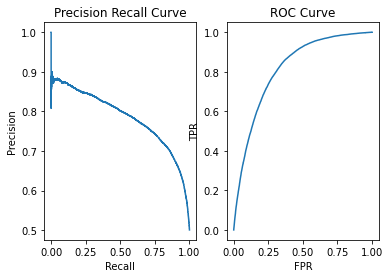

In [41]:
plt.subplot(1, 2, 1)
precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)
plt.title("Precision Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")

plt.subplot(1, 2, 2)
fpr, tpr , threshold = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

<b>Logistic Regression with weights</b>

In [48]:
logcl = LogisticRegression(random_state = 3, n_jobs= -1)
log_params = {'class_weight': [{0:1, 1: 100}] ,"C": [0.001, 0.01, 0.1, 1,10,100]}
gridcv_log = GridSearchCV(logcl, log_params, cv = 4, scoring='roc_auc')
gridcv_log.fit(X_train, y_train)
gridcv_log
#class weights can be tweaked more for better results

GridSearchCV(cv=4, estimator=LogisticRegression(n_jobs=-1, random_state=3),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [{0: 1, 1: 100}]},
             scoring='roc_auc')

In [49]:
y_test_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

In [50]:
my_matrix3 = confusion_matrix(y_test, y_test_pred)
print(my_matrix3)

print("True Pos is:", my_matrix3[1, 1])
print("True Neg is:", my_matrix3[0, 0])
print("False Pos is:", my_matrix3[0, 1])
print("False Neg is:", my_matrix3[1, 0]) 

[[86908   708]
 [82621  5217]]
True Pos is: 5217
True Neg is: 86908
False Pos is: 708
False Neg is: 82621


In [51]:
print('Precision score:', round(precision_score(y_test, y_test_pred),4))
print('Recall score:', round(recall_score(y_test, y_test_pred),4))
print('Accuracy score:', round(accuracy_score(y_test, y_test_pred),4))
print('F1 score:', round(f1_score(y_test, y_test_pred),4))
print('AUC for logistic regression', round(roc_auc_score(y_test, y_pred_proba),4))

Precision score: 0.8805
Recall score: 0.0594
Accuracy score: 0.5251
F1 score: 0.1113
AUC for logistic regression 0.8173


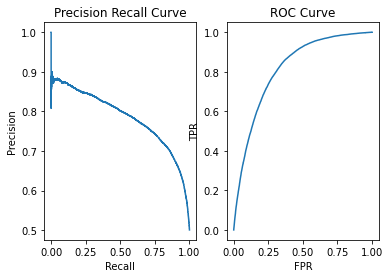

In [52]:
plt.subplot(1, 2, 1)
precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)
plt.title("Precision Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")

plt.subplot(1, 2, 2)
fpr, tpr , threshold = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

<b>Naive Bayes</b>

In [57]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB()

In [55]:
y_test_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

my_matrix4 = confusion_matrix(y_test, y_test_pred)
print(my_matrix4)

print("True Pos is:", my_matrix4[1, 1])
print("True Neg is:", my_matrix4[0, 0])
print("False Pos is:", my_matrix4[0, 1])
print("False Neg is:", my_matrix4[1, 0]) 

[[87000   730]
 [ 7360   849]]
True Pos is: 849
True Neg is: 87000
False Pos is: 730
False Neg is: 7360


In [56]:
print('Precision score:', round(precision_score(y_test, y_test_pred),4))
print('Recall score:', round(recall_score(y_test, y_test_pred),4))
print('Accuracy score:', round(accuracy_score(y_test, y_test_pred),4))
print('F1 score:', round(f1_score(y_test, y_test_pred),4))
print('AUC for logistic regression', round(roc_auc_score(y_test, y_pred_proba),4))

Precision score: 0.5377
Recall score: 0.1034
Accuracy score: 0.9157
F1 score: 0.1735
AUC for logistic regression 0.8392


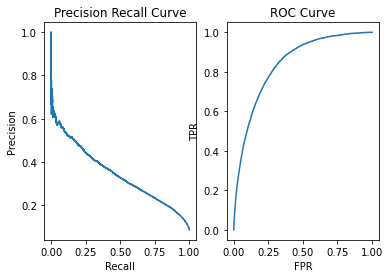

In [58]:
plt.subplot(1, 2, 1)
precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)
plt.title("Precision Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")

plt.subplot(1, 2, 2)
fpr, tpr , threshold = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

<b>KNN</b>

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_params = {'n_neighbors':  range(15, 20, 2)}

knn_grid = GridSearchCV(knn, knn_params, cv = 2)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(15, 20, 2)})

In [60]:
y_pred = knn_grid.best_estimator_.predict(X_test)

In [61]:
y_test_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

my_matrix5 = confusion_matrix(y_test, y_test_pred)
print(my_matrix5)

print("True Pos is:", my_matrix5[1, 1])
print("True Neg is:", my_matrix5[0, 0])
print("False Pos is:", my_matrix5[0, 1])
print("False Neg is:", my_matrix5[1, 0]) 

[[87000   730]
 [ 7360   849]]
True Pos is: 849
True Neg is: 87000
False Pos is: 730
False Neg is: 7360


In [62]:
print('Precision score:', round(precision_score(y_test, y_test_pred),4))
print('Recall score:', round(recall_score(y_test, y_test_pred),4))
print('Accuracy score:', round(accuracy_score(y_test, y_test_pred),4))
print('F1 score:', round(f1_score(y_test, y_test_pred),4))
print('AUC for logistic regression', round(roc_auc_score(y_test, y_pred_proba),4))

Precision score: 0.5377
Recall score: 0.1034
Accuracy score: 0.9157
F1 score: 0.1735
AUC for logistic regression 0.8392


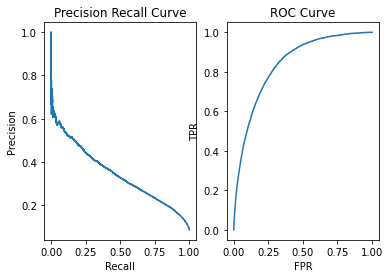

In [63]:
plt.subplot(1, 2, 1)
precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)
plt.title("Precision Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")

plt.subplot(1, 2, 2)
fpr, tpr , threshold = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

<b>Random Forest</b>

In [66]:
oversample = SMOTE(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(heart.iloc[:, 1:], heart['HeartDisease'])
X_train, X_test, y_train, y_test =  train_test_split(X_over, y_over,test_size=0.3, random_state = 0)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

randf = RandomForestClassifier(n_estimators=200, max_samples=100, random_state=3)
param_randf = {'n_estimators': [100,400,600]}
randfgrid = GridSearchCV(randf, param_randf, cv = 3)
randfgrid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_samples=100, n_estimators=200,
                                              random_state=3),
             param_grid={'n_estimators': [100, 400, 600]})

In [67]:
y_pred = randfgrid.best_estimator_.predict(X_test)

In [68]:
y_test_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

my_matrix6 = confusion_matrix(y_test, y_test_pred)
print(my_matrix6)

print("True Pos is:", my_matrix6[1, 1])
print("True Neg is:", my_matrix6[0, 0])
print("False Pos is:", my_matrix6[0, 1])
print("False Neg is:", my_matrix6[1, 0]) 

[[86705   776]
 [82773  5200]]
True Pos is: 5200
True Neg is: 86705
False Pos is: 776
False Neg is: 82773


In [69]:
print('Precision score:', round(precision_score(y_test, y_test_pred),4))
print('Recall score:', round(recall_score(y_test, y_test_pred),4))
print('Accuracy score:', round(accuracy_score(y_test, y_test_pred),4))
print('F1 score:', round(f1_score(y_test, y_test_pred),4))
print('AUC for logistic regression', round(roc_auc_score(y_test, y_pred_proba),4))

Precision score: 0.8701
Recall score: 0.0591
Accuracy score: 0.5238
F1 score: 0.1107
AUC for logistic regression 0.8169


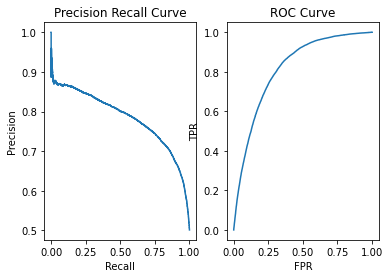

In [70]:
plt.subplot(1, 2, 1)
precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision)
plt.title("Precision Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")

plt.subplot(1, 2, 2)
fpr, tpr , threshold = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()